<a href="https://colab.research.google.com/github/drhollander/DeepLearningWithPython/blob/master/DeepLearningWithPythonCH03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [2]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


Alternatively, you can use the functional interface.

In [0]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


Once an architecture has been constructed, you can compile it and specify which optimizer and loss function to use for training.

In [10]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


The actually training is done by calling the `fit` method on the model.

# IMDB Review Classification

In [0]:
from tensorflow.keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


If we want to see what a sample looks like, we'll have to translate the array of numbers into words. We can do this using the word list stored in the dataset.

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict((value, key) for key, value in word_index.items())
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# we have to shift the decode to account for the encoding scheme

1646592/1641221 [==============================] - 0s 0us/step


In [4]:
reverse_word_index.get(5-3, '?')
#sorted(set((train_data[0])))

'and'

In [5]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Because a neural network expects numeric inputs, and we cannot ensure that future examples will have the same encoding as the imdb data, it is easier to encode the input as a binary vector where column i is 1 if word i is present in the sentence.

In [0]:
import numpy as np

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  # expects a sequence of sequence<int>
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now we build a network architecture to classify sentiment.

In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [0]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
15000/15000 [==============================] - 3s 180us/sample - loss: 0.5710 - acc: 0.7747 - val_loss: 0.4487 - val_acc: 0.8574
Epoch 2/20
15000/15000 [==============================] - 2s 103us/sample - loss: 0.3552 - acc: 0.8929 - val_loss: 0.3302 - val_acc: 0.8803
Epoch 3/20
15000/15000 [==============================] - 1s 100us/sample - loss: 0.2531 - acc: 0.9183 - val_loss: 0.2860 - val_acc: 0.8917
Epoch 4/20
15000/15000 [==============================] - 2s 100us/sample - loss: 0.1987 - acc: 0.9343 - val_loss: 0.2777 - val_acc: 0.8911
Epoch 5/20
15000/15000 [==============================] - 1s 99us/sample - loss: 0.1601 - acc: 0.9482 - val_loss: 0.2959 - val_acc: 0.8819
Epoch 6/20
15000/15000 [==============================] - 2s 100us/sample - loss: 0.1314 - acc: 0.9597 - val_loss: 0.2811 - val_acc: 0.8895
Epoch 7/20
15000/15000 [==============================] - 1s 10

In [14]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 105us/sample - loss: 0.7256 - acc: 0.8521


In [15]:
results

[0.7256492724561692, 0.85212]

In [0]:
history_dict = history.history

In [26]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot_loss(history_dict):
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  
  epochs = range(1, len(loss_values)+1)
  
  plt.plot(epochs, loss_values, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  
  plt.show()

In [0]:
def plot_accuracy(history_dict):
  acc_values = history_dict['acc']
  val_acc_values = history_dict['val_acc']
  
  epochs = range(1, len(acc_values)+1)
  
  plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
  plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  
  plt.show()

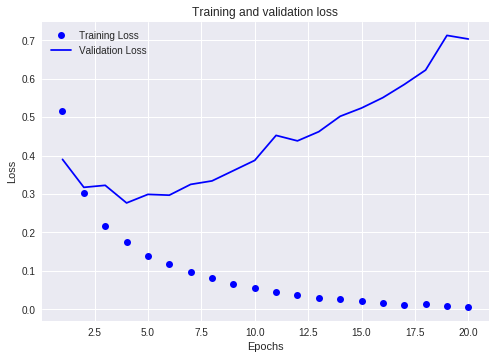

In [30]:
plot_loss(history.history)

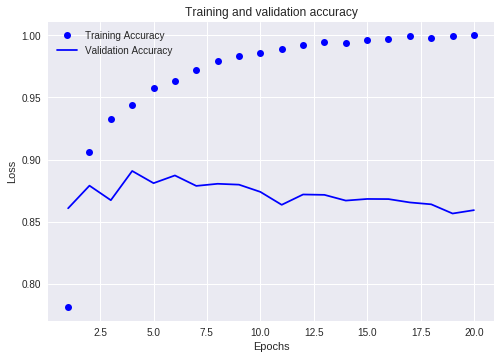

In [31]:
plot_accuracy(history.history)

The model overfits as the number of epochs increase. We can try to limit training to 4 epochs and see how well it does.

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 2s 68us/sample - loss: 0.4898 - acc: 0.8205
Epoch 2/4
25000/25000 [==============================] - 2s 65us/sample - loss: 0.2856 - acc: 0.9038
Epoch 3/4
25000/25000 [==============================] - 2s 63us/sample - loss: 0.2146 - acc: 0.9248
Epoch 4/4
25000/25000 [==============================] - 2s 63us/sample - loss: 0.1775 - acc: 0.9369


In [17]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 108us/sample - loss: 0.2846 - acc: 0.8865


[0.28463597324371337, 0.88652]

To predict the output of new data, you can use the `predict` method.

In [34]:
model.predict(x_test), y_test

(array([[0.01344559],
        [0.9999963 ],
        [0.7675024 ],
        ...,
        [0.08694142],
        [0.03235522],
        [0.92654186]], dtype=float32),
 array([0., 1., 1., ..., 0., 0., 0.], dtype=float32))

# Classifying Newswires

In [35]:
from keras.datasets import reuters

Using TensorFlow backend.


In [36]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [67]:
len(train_data), len(test_data)

11228

In [38]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [68]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [0]:
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [43]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [0]:
x_train = vectorize_sequences(train_data, 10000)
x_test = vectorize_sequences(test_data, 10000)

Because this is a multiclass classification problem, we need to use one-hot encoding on the labels.

In [0]:
def to_one_hot(labels, dimensions=46):
  # expects labels to be a sequence of integers, k=0..n, representing class C_k
  results = np.zeros((len(labels), dimensions))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

In [0]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [53]:
one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Alternatively, we can use the Keras API to do this:

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [57]:
one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [0]:
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [70]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 95us/sample - loss: 2.5990 - acc: 0.5001 - val_loss: 1.6946 - val_acc: 0.6440
Epoch 2/20
7982/7982 [==============================] - 1s 74us/sample - loss: 1.4033 - acc: 0.7038 - val_loss: 1.2904 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 77us/sample - loss: 1.0484 - acc: 0.7737 - val_loss: 1.1236 - val_acc: 0.7490
Epoch 4/20
7982/7982 [==============================] - 1s 76us/sample - loss: 0.8261 - acc: 0.8260 - val_loss: 1.0325 - val_acc: 0.7830
Epoch 5/20
7982/7982 [==============================] - 1s 74us/sample - loss: 0.6579 - acc: 0.8608 - val_loss: 0.9472 - val_acc: 0.8020
Epoch 6/20
7982/7982 [==============================] - 1s 75us/sample - loss: 0.5232 - acc: 0.8908 - val_loss: 0.8986 - val_acc: 0.8160
Epoch 7/20
7982/7982 [==============================] - 1s 75us/sample - loss: 0.4197 - acc: 0.9131 - val_loss: 0.8814 - val_acc: 

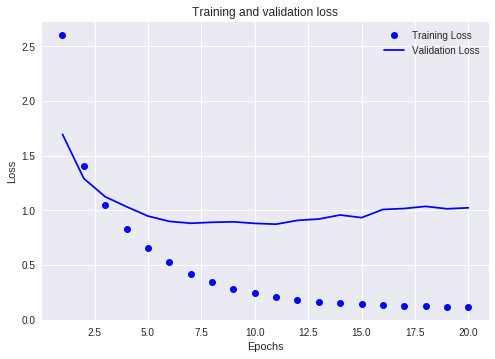

In [71]:
plot_loss(history.history)

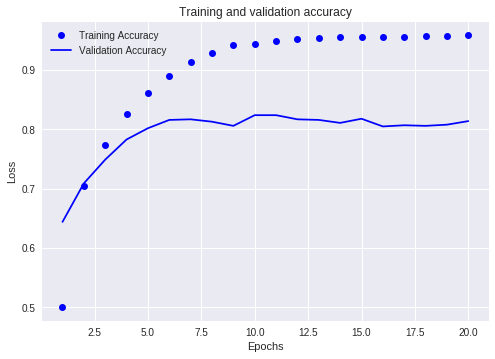

In [72]:
plot_accuracy(history.history)

In [73]:
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 79us/sample - loss: 0.1051 - acc: 0.9577 - val_loss: 1.0658 - val_acc: 0.7980
Epoch 2/9
7982/7982 [==============================] - 1s 78us/sample - loss: 0.1073 - acc: 0.9572 - val_loss: 1.0263 - val_acc: 0.8150
Epoch 3/9
7982/7982 [==============================] - 1s 77us/sample - loss: 0.1035 - acc: 0.9575 - val_loss: 1.0934 - val_acc: 0.8110
Epoch 4/9
7982/7982 [==============================] - 1s 77us/sample - loss: 0.1039 - acc: 0.9585 - val_loss: 1.0439 - val_acc: 0.8120
Epoch 5/9
7982/7982 [==============================] - 1s 72us/sample - loss: 0.0980 - acc: 0.9592 - val_loss: 1.1477 - val_acc: 0.7870
Epoch 6/9
7982/7982 [==============================] - 1s 72us/sample - loss: 0.0978 - acc: 0.9582 - val_loss: 1.1228 - val_acc: 0.8030
Epoch 7/9
7982/7982 [==============================] - 1s 74us/sample - loss: 0.0998 - acc: 0.9559 - val_loss: 1.1278 - val_acc: 0.8030


In [74]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 105us/sample - loss: 1.3321 - acc: 0.7814
